In [1]:
import numpy as np
import scipy 
import scipy.signal
import random
import numpy.fft
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
exp = np.exp
arange = np.arange

In [2]:
def sym_derivative(x,y,smooth=None):
    #if smooth=='yes':
     #   y_in=scipy.signal.savgol_filter(y,51,3)
    #elif smooth=='no':
      #  y_in=y
    deriv=np.zeros(len(x))
    for i in range(len(x)):
        if i==0:
            dy=y[i+1]-y[i]
            dx=x[i+1]-x[i]
            deriv[i]=dy/dx
        elif i==len(x)-1:
            dy=y[i]-y[i-1]
            dx=x[i]-x[i-1]
            deriv[i]=dy/dx
        else:
            dy=y[i+1]-y[i-1]
            dx=x[i+1]-x[i-1]
            deriv[i]=dy/dx
    return deriv

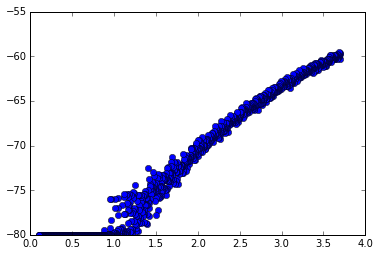

0.75186533212


In [17]:
array=np.loadtxt('1D_Ising_3.7_0.1_1100_50000_tau460_1x40_2.txt')
T=array[0]
E=array[1]
CV=array[2]
M=array[3]
Chi=array[4]
ED=array[5]
E_smooth=scipy.signal.savgol_filter(E,51,3)
CV_deriv=sym_derivative(T,E_smooth)

plt.plot(T,E,'bo')
plt.show()
print(T[900])

In [102]:
def E_fit_func(x,N,c):
    return -N*scipy.tanh(1/x)+c

def sech(x):
    return scipy.cosh(x)**(-1.)

def CV_fit_func(x,N,k,c):
    return (N/((x+k)**2.))*((sech(1/(x+c))**2.))


N1= 42.3489976148 +/- 0.28036518491
c1= -49.9248941218 +/- 0.127806366414


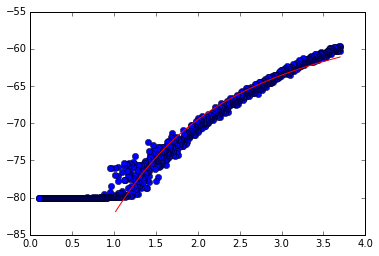

In [42]:
popt1, pcov1 = curve_fit(E_fit_func, T[:820], E[:820], p0=[40,-49.])
perr1 = np.sqrt(np.diag(pcov1))
N1=popt1[0]
N1_err=perr1[0]
print('N1=', N1, '+/-', N1_err)
c1=popt1[1]
c1_err=perr1[1]
print('c1=', c1, '+/-', c1_err)

plt.plot(T,E,'bo')
plt.plot(T[:820],E_fit_func(T[:820],N1,c1),'r-')
plt.show()

N2= 48.126754174 +/- 2.87862497585
k2= 0.763609819451 +/- 0.0975411479589
c2= -0.505400191075 +/- 0.0146364128798


/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:5: RuntimeWarning: overflow encountered in cosh


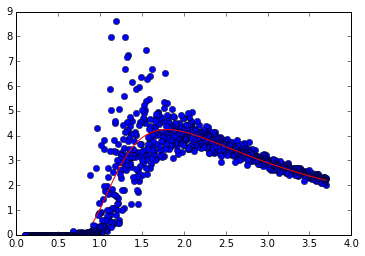

In [101]:
popt2, pcov2 = curve_fit(CV_fit_func, T[:850], CV[:850], p0=[40,1,-1.])
perr2 = np.sqrt(np.diag(pcov2))
N2=popt2[0]
N2_err=perr2[0]
print('N2=', N2, '+/-', N2_err)
k2=popt2[1]
k2_err=perr2[1]
print('k2=', k2,'+/-', k2_err)
c2=popt2[2]
c2_err=perr2[2]
print('c2=', c2, '+/-', c2_err)

plt.plot(T,CV,'bo')
plt.plot(T[:850],CV_fit_func(T[:850],N2,k2,c2),'r-')
plt.show()

In [5]:
def lin_fit(x,B,a):#(x,B1,B2,Tc,a1,a2):
    return a*x+B
    #return np.piecewise(x, [x<Tc,x>Tc], [lambda x:B1-(a1*x), lambda x:B2-(a2*x)])

a1= -0.323065481779 +/- 0.0599144164091
C1= 6.55801888036 +/- 0.133754740286


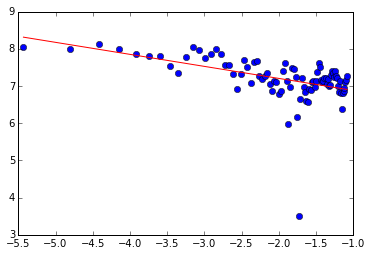

In [34]:
x1=np.log(2.26798-T[322:410])
y1= np.log(abs(CV_deriv[322:410]))
f1, f1_err= np.polyfit(x1, y1, 1, cov=True)
lin=np.poly1d(f1)
err1 = np.sqrt(np.diag(f1_err))
a1=f1[0]
a1_err=err1[0]
print('a1=', a1, '+/-', a1_err)
C1=f1[1]
C1_err=err1[1]
print('C1=', C1, '+/-', C1_err)
#plt.plot(np.log(2.26798-T[322:]),np.log(abs(CV_deriv[322:])),'bo')
plt.plot(x1,y1,'bo')
plt.plot(x1,a1*x1+C1,'r-')
plt.show()

a2= -0.429632213023 +/- 0.0920800903072
C2= 6.65732279526 +/- 0.252200723587


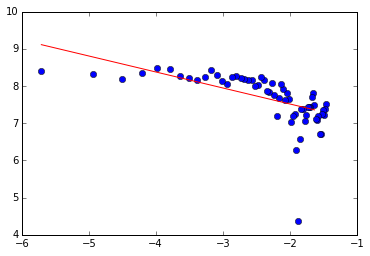

In [35]:
#popt2, pcov2 = curve_fit(lin_fit, np.log(T[100:319]-2.26798), np.log(abs(CV_deriv[100:319])), p0=[1.,1.])
x2=np.log(T[270:321]-2.26798)
y2= np.log(abs(CV_deriv[270:321]))
f2, f2_err= np.polyfit(x2, y2, 1, cov=True)
lin=np.poly1d(f1)
err2 = np.sqrt(np.diag(f2_err))
a2=f2[0]
a2_err=err2[0]
print('a2=', a2, '+/-', a2_err)
C2=f2[1]
C2_err=err2[1]
print('C2=', C2, '+/-', C2_err)
plt.plot(np.log(T[260:321]-2.26798),np.log(abs(CV_deriv[260:321])),'bo')
plt.plot(x2,a2*x2+C2,'r-')
plt.show()

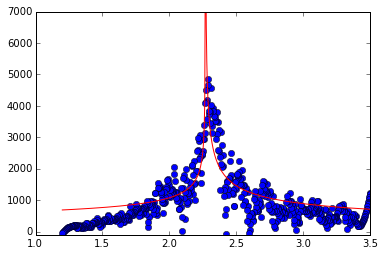

In [36]:
plt.plot(T,CV_deriv,'bo')
#plt.plot(T, fit_func(T,np.exp(C1),2.26798,a1),'r-')
#plt.plot(T, fit_func(T,np.exp(C2),2.26798,a2),'g-')
plt.plot(T, fit_func2(T,np.exp(C1),np.exp(C2),2.26798,-a1,-a2),'r-')
plt.ylim(-100,7000.)
plt.show()

In [7]:
def mag_fit(x,B,T_c,b):
    return np.piecewise(x, [x<=T_c,x>T_c], [lambda x:B*(abs((T_c-x))**b), lambda x:0])

2.25592654424
B= 1614.26520912 +/- [ 15.38704339]
T_c= 2.27921748025 +/- 0.00780020307568
b= 0.0817631099618 +/- 0.00787431754341


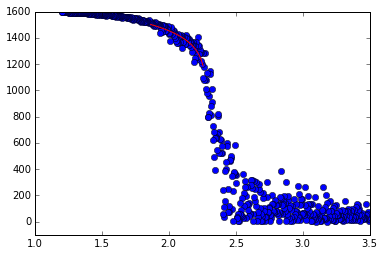

In [11]:
print(T[324])
popt, pcov = curve_fit(mag_fit, T[322:427], abs(M[322:427]), p0=[1606.,2.278,0.11])
perr = np.sqrt(np.diag(pcov))
B=popt[0]
B_err=perr[[0]]
print('B=', B, '+/-', B_err)
T_c=popt[1]
T_c_err=perr[1]
print('T_c=', T_c, '+/-', T_c_err)
b=popt[2]
b_err=perr[2]
print('b=', b, '+/-', b_err)
#c=popt[3]
#print(c)
plt.plot(T,abs(M),'bo')
plt.plot(T[324:427],mag_fit(T[324:427],B,T_c,b),'r-')
plt.ylim(-100)
plt.show()

b1= 0.104708460553 +/- 0.00513443003109
C3= 7.40197583791 +/- 0.00816191781921


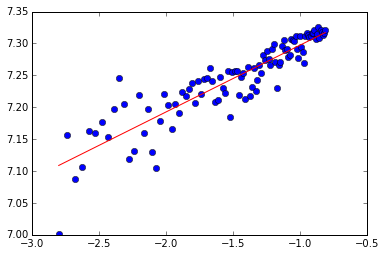

In [91]:
x3=np.log(2.3167-T[324:425])
y3=np.log(M[324:425])
f3, f3_err=np.polyfit(x3,y3,1,cov=True)
err3 = np.sqrt(np.diag(f3_err))
b1=f3[0]
b1_err=err3[0]
print('b1=', b1, '+/-', b1_err)
C3=f3[1]
C3_err=err3[1]
print('C3=', C3, '+/-', C3_err)
plt.plot(np.log(2.3167-T[324:425]),np.log(M[324:425]),'bo')
plt.plot(x3,b1*x3+C3,'r-')
plt.show()

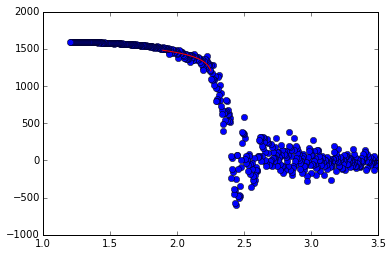

In [81]:
plt.plot(T,M,'bo')
plt.plot(T[325:420],mag_fit(T[325:420],np.exp(C3),2.26798,b1),'r')
plt.show()

In [17]:
def CV_fit_func2(x,B,T_c):
    return (B/(x**2.))*np.log(abs(1./(x-T_c)))

def CV_fit_func3(x,B,T_c):
    return B*((-1)*np.log(abs((T_c-x)/T_c)))

603.234652171
2.27425436482


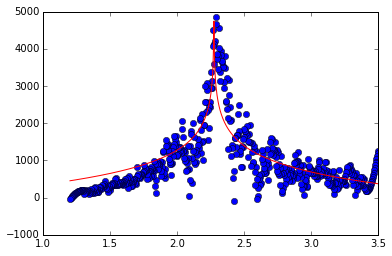

In [118]:
popt, pcov = curve_fit(CV_fit_func3, T, CV_deriv, p0=[493,2.27])
B=popt[0]
print(B)
T_c=popt[1]
print(T_c)
plt.plot(T,CV_deriv,'bo')
plt.plot(T,CV_fit_func3(T,B,T_c),'r-')
plt.show()